# Laboratorio 5 - Inteligencia Artificial
Autores: Stefano Aragoni, Carol Arévalo, Luis Santos

### Task 1.0: Exploración y Limpieza de Datos
Como primer paso, se importa el archivo a través de distintas librerías. 

In [32]:
# Importar librerías 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Cargar el dataset
data = pd.read_csv('dataset_phishing.csv')

# Imprimir las primeras 5 filas
data.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


##### Datos Faltantes
En este caso, primero se analizó si hacían falta datos en el dataset. En este caso, todos los datos estaban almacenados y no habían datos fuera de lugar. 

Index([], dtype='object')

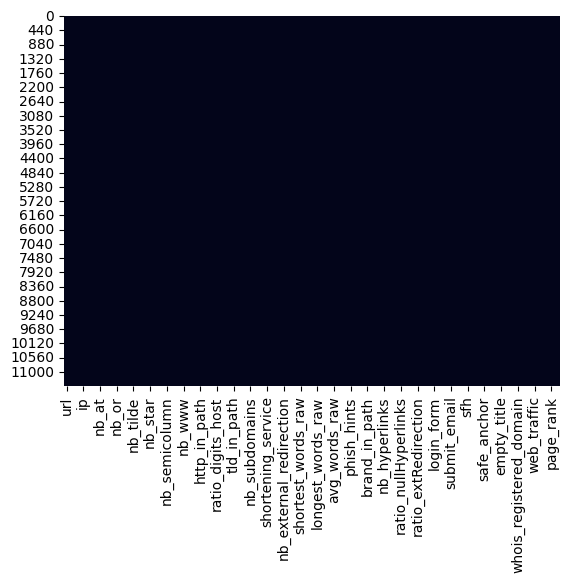

In [33]:
# Matriz de datos faltantes
sns.heatmap(data.isnull(), cbar=False)

# Mostrar columnas con datos faltantes, o con datos fuera de lugar (como un string en columna numérica)
data.columns[data.isnull().any()]

##### Encoding
En este caso, se necesita convertir a la columna Status a una variable númerica. Esta columna almacena "legitimate" o "phishing" dependiendo de cuál haya sido el resultado; se debe hacer un procedimiento de encoding. 0 representará legitimate y 1 phishing.

In [34]:
data = pd.read_csv('dataset_phishing.csv')

# Imprimir columas que no sean numéricas
print('Columnas categóricas:\n',data.select_dtypes(exclude=[np.number]).dtypes)

# Convertir Status a numérico
data['status'] = data['status'].map({'legitimate': 0, 'phishing': 1})

# Eliminar la columa de URL
data = data.drop('url', axis=1)

# Imprimir las primeras 5 filas
print('\n\nDatos convertidos:')
data.head()

Columnas categóricas:
 url       object
status    object
dtype: object


Datos convertidos:


,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,37,19,0,3,0,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,0
1,77,23,1,1,0,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,1
2,126,50,1,4,1,0,1,2,0,3,...,1,0,0,14,4004,5828815,0,1,0,1
3,18,11,0,2,0,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,0
4,55,15,0,2,2,0,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,0


##### Balanceo
En este caso, primero se determinó la proporción de datos correspondiente. Ya que se contaba con una cantidad igual de muestras para phishing y legitimate, no hubo necesidad de hacer balanceo.

In [35]:
# Calcular cuantas columnas son phishing y cuantas no
print('Número de phishing:',data[data['status'] == 1].shape[0])
print('Número de legitimate:',data[data['status'] == 0].shape[0])

Número de phishing: 5715
Número de legitimate: 5715


##### Escalar
En este caso, se utilizó la librería de SKLearn para poder escalar y normalizar los datos que lo necesitaran. Asimismo, también se hizo un análisis pre y post escalamiento para determinar la distribución de los datos. En el preprocesamiento, se podía observar cómo ciertas variables tenían una alta desviación estándar a comparación de su respectiva media. Esto fue solucionado a través de la función de StandardScaler(). 

>Asimismo, es importante mencionar que la normalización de datos es importante cuando se está utilizando modelos KNN o SVM. 

In [36]:
# Calcular media y desviación estándar de cada columna
print('\n\nMedia y desviación estándar de cada columna:')
data.describe()



Media y desviación estándar de cada columna:


,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739,0.500000
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955,0.500022
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000,0.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000,0.500000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000,1.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000,1.000000


In [37]:
# Libreía para escalar los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data.drop('status',axis=1))

# Escalar los datos
scaled_features = scaler.transform(data.drop('status',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=data.columns[:-1])

# Agregar la columna de status
df_feat['status'] = data['status']

df_feat.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,-0.436327,-0.193964,-0.421020,0.379116,-0.477984,-0.142915,-0.387464,-0.197604,0.0,-0.293683,...,-1.860473,1.129194,-0.28037,-0.549299,-1.307594,-0.429340,6.978227,0.934264,0.320974,0
1,0.287067,0.177207,2.375182,-1.081136,-0.477984,-0.142915,-0.387464,-0.197604,0.0,-0.293683,...,0.537498,-0.885587,-0.28037,-0.510022,0.548471,-0.429340,-0.143303,0.934264,-0.467407,1
2,1.173224,2.682613,2.375182,1.109242,0.001174,-0.142915,2.356473,2.237556,0.0,2.711505,...,0.537498,-0.885587,-0.28037,-0.587348,-0.018839,2.491612,-0.143303,0.934264,-1.255788,1
3,-0.779940,-0.936306,-0.421020,-0.351010,-0.477984,-0.142915,-0.387464,-0.197604,0.0,-0.293683,...,0.537498,-0.885587,-0.28037,-0.528433,-1.307594,-0.375359,-0.143303,-1.070361,-0.073217,0
4,-0.110800,-0.565135,-0.421020,-0.351010,0.480332,-0.142915,-0.387464,-0.197604,0.0,-0.293683,...,-1.860473,1.129194,-0.28037,-0.329595,1.323334,-0.424968,-0.143303,-1.070361,1.109355,0


Finalmente, se quiso determinar la correlacion entre las variables con status para poder graficar dos variables y los grupos posteriormente. En este caso, "page_rank", "nb_www", "nb_hyperlinks", y "domain_age" presentaron los índices de correlación más alta. Por tal razón, se utilizarán estas variables y otras con correlación mayor a abs(0.2) para el respectivo análisis. 

In [38]:
# Correlación entre las columnas y el status
df_feat.corr()['status'].sort_values()

page_rank              -0.511137
nb_www                 -0.443468
nb_hyperlinks          -0.342628
domain_age             -0.331889
ratio_intHyperlinks    -0.243982
                          ...   
ratio_nullHyperlinks         NaN
ratio_intRedirection         NaN
ratio_intErrors              NaN
submit_email                 NaN
sfh                          NaN
Name: status, Length: 88, dtype: float64

In [39]:
# Eliminar las columnas con correlación menor a abs(0.2)

variables = df_feat.corr()['status'].sort_values().index
variables = variables[abs(df_feat.corr()['status'].sort_values()) > 0.2]

# Imprimir las columnas que se van a usar
print('Columnas a usar:\n',variables)

# Eliminar las columnas que no se van a usar
df_feat = df_feat[variables]

Columnas a usar:
 Index(['page_rank', 'nb_www', 'nb_hyperlinks', 'domain_age',
       'ratio_intHyperlinks', 'longest_words_raw', 'nb_dots', 'empty_title',
       'tld_in_subdomain', 'longest_word_path', 'prefix_suffix',
       'shortest_word_host', 'ratio_digits_host', 'nb_eq', 'length_hostname',
       'nb_slash', 'length_url', 'nb_qm', 'ip', 'phish_hints',
       'domain_in_title', 'ratio_digits_url', 'google_index', 'status'],
      dtype='object')


----------
### Task 1.1: K-Nearest Neighbors

#### Task 1.1.1: KNN Manual
En este caso, se creó un algoritmo de KNN con las siguientes consideraciones.
1. La distancia entre puntos debe ser la dada por la forma de la distancia Euclidiana
2. Utilice el dataset proporcionado para mostrar el funcionamiento de su algoritmo
3. Provea una métrica de desempeño, justificando su elección
4. Grafique los grupos encontrados (Puede usar solamente dos variables para mostrarlos en un plano cartesiano)
5. Mencione, como comentario las consideraciones extras que tuvo que tomar en cuenta durante la realización de su implementación

Referencia de algoritmo KNN: https://www.javatpoint.com/k-nearest-neighbor-algorithm-for-machine-learning

In [40]:
# FUNCIONES

# Distancia euclidiana
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2, axis=1))

# Clase más común dentro de los vecinos
def most_frequent(vecinos): 
    return max(set(vecinos), key = vecinos.count)

# Predicción
def predict(X_train, X_test, y_train, k):
    vecinos = []

    for x in X_test:
        distancia = euclidean_distance(x, X_train)
        # Ordenar los vecinos por distancia
        vecinos_ordenados = [y_train[i] for i in sorted(range(len(distancia)), key=lambda j: distancia[j])]
        vecinos_ordenados = vecinos_ordenados[:k]
        # Almacenar K top vecinos
        vecinos.append(vecinos_ordenados)

    # Obtener la clase más común
    resultado = []
    for vecino in vecinos:
        resultado.append(most_frequent(vecino))
    return resultado

# Evaluar modelo a través de accuracy
def evaluate(y_test, y_pred):
    count_aciertos = 0
    for i in range(len(y_test)):
        if y_test[i] == y_pred[i]:
            count_aciertos += 1

    return count_aciertos / len(y_test)

In [41]:
# Separar los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_feat.drop('status',axis=1), df_feat['status'], test_size=0.20)

# Cantidad de vecinos a considerar = raíz cuadrada de la cantidad de datos de prueba
neighbors = len(X_test)**0.5
neighbors = int(neighbors)
# Numero impar de neighbors
if neighbors % 2 == 0:
    neighbors += 1

# Calcular la precisión
y_pred = predict(X_train.values, X_test.values, y_train.values, neighbors)
print('Precisión:',evaluate(y_test.values, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test.values, y_pred)
print('Matriz de confusión:\n',cm)

Precisión: 0.9396325459317585
Matriz de confusión:
 [[1094   56]
 [  82 1054]]


> Métricas de Desempeño

@Luis o Carol
Explicar por qué se usó matriz de confusión y acurracy. La explicación y relevancia de cada una está en la presentación de la semana pasada.

> CONSIDERACIONES EXTRAS:

todo @Luis o Carol
Hablar sobre relevancia de variables y cómo no todas afectan de igual manera el grupeo de datos. Entonces que había que usar variables que permitieran hacer esto y que no causaran ruido. Mencionar importancia de normalización de datos.

Posteriormente, se graficaron los grupos generados por el KNN (algoritmo sin librerias). 

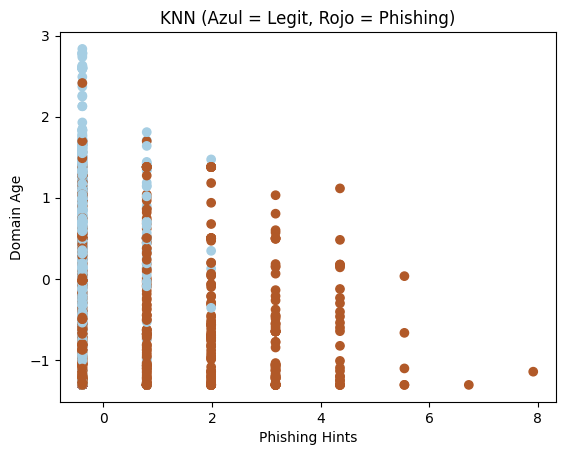

In [42]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, neighbors

# Variables a seleccionar para la gráfica: domain_age y phish_hints

X = X_test[['phish_hints', 'domain_age']]

# Graficar en X page_rank y en Y nb_www; color según status
plt.scatter(X['phish_hints'], X['domain_age'], c=y_pred, cmap=plt.cm.Paired)
plt.xlabel('Phishing Hints')
plt.ylabel('Domain Age')
plt.title('KNN (Azul = Legit, Rojo = Phishing)')
plt.show()

#### Task 1.1.2: KNN con SKLearn
En este caso, se repitió el mismo procedimiento pero esta vez se utilizó la librería de SKLearn para realizar el respectivo modelo. En este caso, ambos presentaros resultados iguales... sin embargo, SKLearn es capaz de hacer los cálculos de manera más rápida. 

In [43]:
# KNN con sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

# Calcular accuracy
print('Precisión:',accuracy_score(y_test, predictions))

# Calcular la matriz de confusión
print('Matriz de confusión:\n', confusion_matrix(y_test, predictions))



Precisión: 0.94750656167979
Matriz de confusión:
 [[1097   53]
 [  67 1069]]


Finalmente, se graficaron los grupos generados por el KNN de SKLearn. 

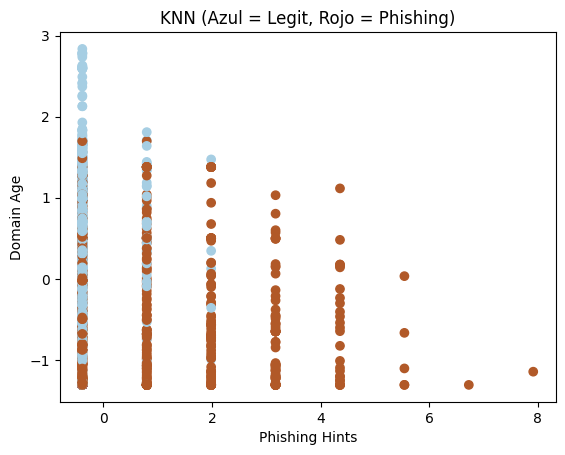

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, neighbors

# Variables a seleccionar para la gráfica: domain_age y phish_hints

X = X_test[['phish_hints', 'domain_age']]

# Graficar en X page_rank y en Y nb_www; color según status
plt.scatter(X['phish_hints'], X['domain_age'], c=predictions, cmap=plt.cm.Paired)
plt.xlabel('Phishing Hints')
plt.ylabel('Domain Age')
plt.title('KNN (Azul = Legit, Rojo = Phishing)')
plt.show()

> Métricas de Desempeño

@Luis o Carol
Explicar por qué se usó matriz de confusión y acurracy. La explicación y relevancia de cada una está en la presentación de la semana pasada.

---------
### Task 1.2: Support Vector Machines
A continuación se creó un modelo SVM con SKLearn en base a las siguientes consideraciones:
1. Divida el dataset en 80% para entrenamiento, 10% para validación (tuning) y 10% para test
2. Provea una métrica de desempeño, justificando su elección
3. Grafique los grupos encontrados (Puede usar solamente dos variables para mostrarlos en un plano cartesiano)
5. Mencione, como comentario que variables tuvieron que hacer tunning y cualquier otra consideración extra que tuvieron que tomar en cuenta

Como primer paso, se divió el dataset en las proporciones anteriormente indicadas. Cabe destacar que la variable de status se cambió de 0 a -1 y 1 a 1 para así cumplir con el requisito de SVM.

In [45]:
# Cambiar la columna de status a -1 y 1
df_svm = df_feat.copy()
df_svm['status'] = df_feat['status'].map({0: -1, 1: 1})

# Dividir los datos en entrenamiento (80%) y test (20%)
X_train, X_test_val, y_train, y_test_val = train_test_split(df_svm.drop('status',axis=1), df_svm['status'], test_size=0.20)

# Dividir los datos de entrenamiento y validación (80%) en entrenamiento (80%) y validación (20%)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5)

# Comprobar tamaño de los datos
print('Tamaño de los datos de entrenamiento:',X_train.shape)
print('Tamaño de los datos de validación:',X_val.shape)
print('Tamaño de los datos de test:',X_test.shape)

Tamaño de los datos de entrenamiento: (9144, 23)
Tamaño de los datos de validación: (1143, 23)
Tamaño de los datos de test: (1143, 23)


> CONSIDERACIONES EXTRAS:

todo @Luis o Carol
Hablar sobre relevancia de variables y cómo no todas afectan de igual manera el grupeo de datos (brevemente ya que esto lo dijeron antes también). Hablar sobre diferencia entre SVM y KNN. Hablar sobre diferentes tipos de SVM y como estos pueden presentar diferentes resultados. Indicar que rbf saca mejor resultado que linear, por ejemplo.

Explicar que se le hizo tunning a la variable de status porque SVM solo acepta valores -1 y 1.

Posteriormente, se creó el modelo de Support Vector Machines utilizando SKLearn.
A través de GridSearchCV, se logró hacer el GridSearch y Cross Validation al mismo tiempo. 

In [49]:
# Support Vector Machine con sklearn
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Cross validation con grid search
from sklearn.model_selection import GridSearchCV

# Crear el modelo
svm = SVC()

# Crear el diccionario de parámetros a probar           https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01], 'kernel': ['rbf', 'linear', 'poly']}

# Inicializar el gridsearch y cross validation
grid = GridSearchCV(svm, param_grid, refit=True, verbose=2)

# Usar los datos de validacion (10%) para el GridSearch-CrossValidation
grid.fit(X_val, y_val)

# Imprimir los mejores parámetros
print('Mejores parámetros:',grid.best_params_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.5s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1

En base a los mejores parámetros previamente calculados, se realiza el modelo correspondiente con SKLearn.

In [50]:
# Hacer modelo con los mejores parámetros
svm = SVC(C=grid.best_params_['C'], gamma=grid.best_params_['gamma'], kernel=grid.best_params_['kernel'])

# Entrenar el modelo
svm.fit(X_train, y_train)

# Hacer predicciones
predictions = svm.predict(X_test)

# Calcular accuracy
print('Precisión:',accuracy_score(y_test, predictions))

# Calcular la matriz de confusión
print('\nMatriz de confusión:\n', confusion_matrix(y_test, predictions))

Precisión: 0.968503937007874

Matriz de confusión:
 [[555  16]
 [ 20 552]]


> Métricas de Desempeño

@Luis o Carol
Explicar por qué se usó matriz de confusión y acurracy. La explicación y relevancia de cada una está en la presentación de la semana pasada.

Para finalizar, se graficaron los grupos creados con la predicción del modelo de SVM que usaba KLearn.

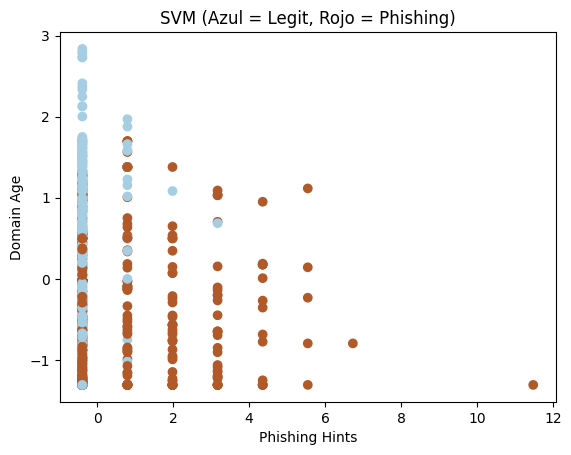

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, neighbors

# Variables a seleccionar para la gráfica: domain_age y phish_hints

X = X_test[['phish_hints', 'domain_age']]

# Graficar en X page_rank y en Y nb_www; color según status
plt.scatter(X['phish_hints'], X['domain_age'], c=predictions, cmap=plt.cm.Paired)
plt.xlabel('Phishing Hints')
plt.ylabel('Domain Age')
plt.title('SVM (Azul = Legit, Rojo = Phishing)')
plt.show()